In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
import itertools

In [8]:
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 200)

# Traigo datos

In [55]:
dataset = pd.read_excel('./Data para Proyecciones/Dataset_Proyecciones.xlsx', sheet_name='V3')
dataset.set_index(pd.date_range(start='2015-01-01', end='2019-12-01', freq='MS'), drop=True, inplace=True)
dataset.head()

,Demanda de guantes,EMAE Manufactura,EMAE Construccion,EMAE Mineria,Produccion Oil m3 Argentina,Precio Brent ARG,Produccion Gas Mm3 Argentina,PBI Valor Agregado,Trabajadores Construccion,Trabajadores Patagonia LAG12,Trabajadores Patagonia,Trabajores Construccion LAG12,Trabajadores Manufactura LAG12,Trabajadores Manufactura,IPI LAG 12,Suma de metros_perforados,Año mes
2015-01-01,137167,118.272738,146.689712,95.146670,2.386948e+06,300.400848,3.595407e+06,4.274443e+06,430.9,414.948,429.357,416.260,1259.159,1242.089,124.1,9806,2015-01-01
2015-02-01,91064,116.838170,147.782989,88.288470,2.205169e+06,365.437380,3.229374e+06,4.274443e+06,435.3,418.194,434.143,415.441,1260.063,1248.481,127.2,15422,2015-02-01
2015-03-01,100712,134.927216,151.920156,97.375158,2.382703e+06,351.536922,3.612211e+06,4.274443e+06,446.4,414.549,432.568,417.428,1259.079,1253.462,138.6,17427,2015-03-01
2015-04-01,102738,137.381394,151.984589,93.843158,2.270871e+06,374.368896,3.515646e+06,5.016966e+06,451.8,404.321,424.827,416.832,1254.877,1254.039,144.1,18062,2015-04-01
2015-05-01,62442,139.361062,153.409565,100.678522,2.397610e+06,403.050384,3.669902e+06,5.016966e+06,456.5,399.562,419.921,420.505,1248.568,1252.417,143.2,8101,2015-05-01


In [56]:
dataset.drop(columns=['Año mes'], inplace=True)

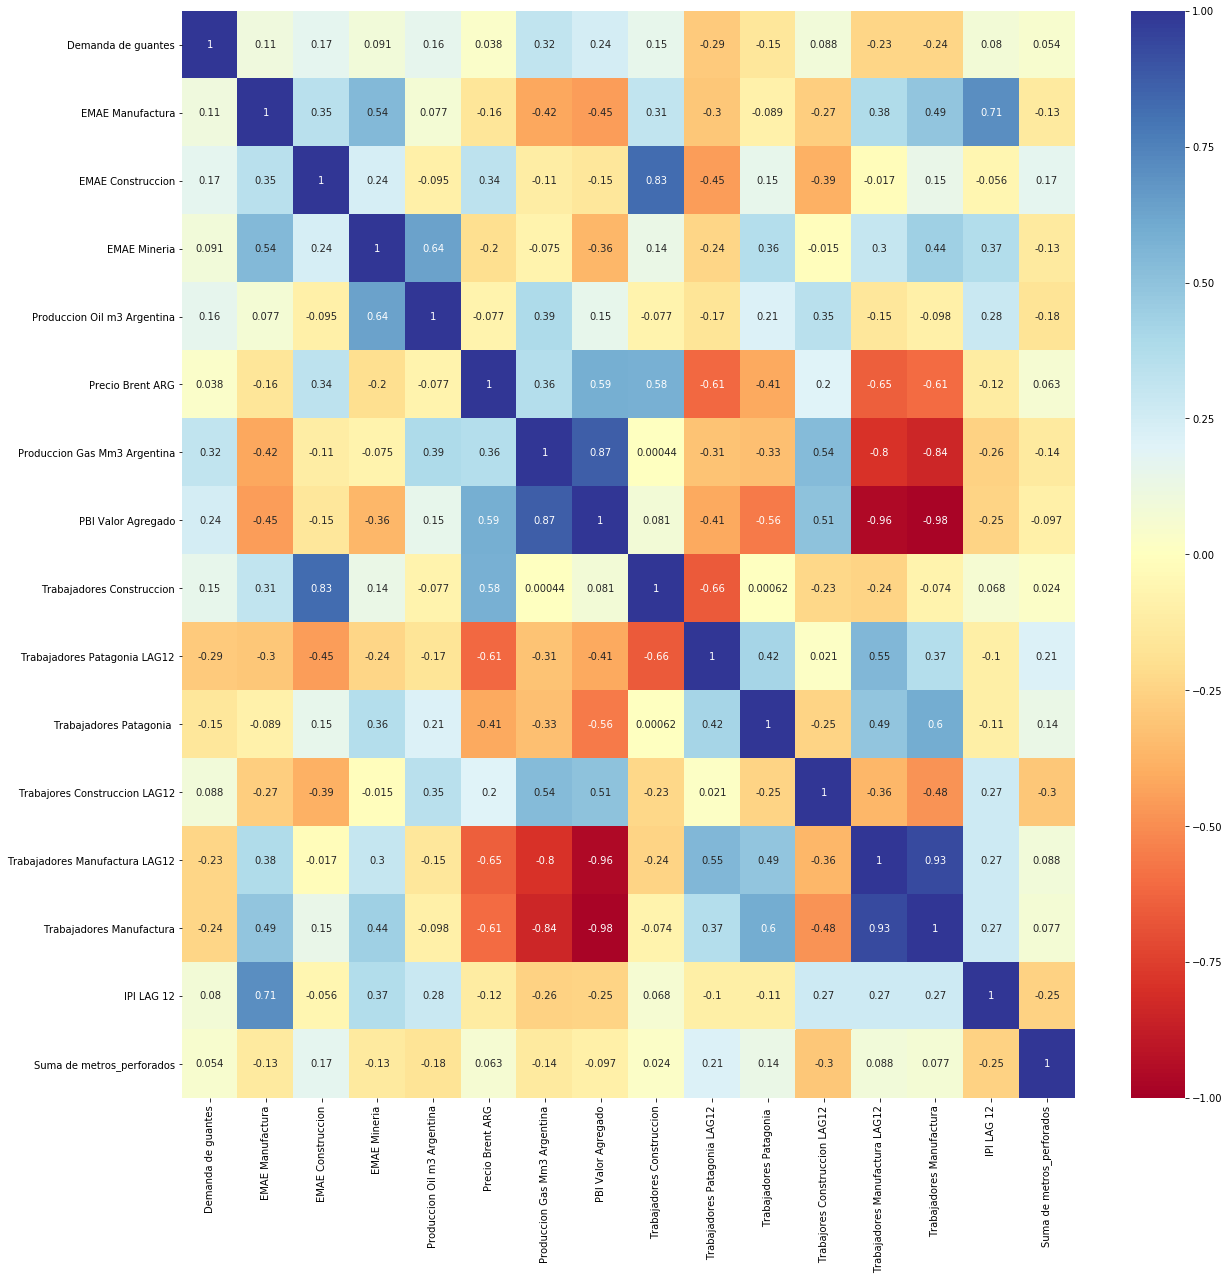

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap='RdYlBu', annot=True)

In [58]:
for col in dataset[[col for col in dataset.columns if 'LAG' not in col]].drop(columns=['Demanda de guantes']).columns:
    dataset[f'{col} LAG1'] = dataset[col].shift(periods=1)
    dataset[f'{col} LAG12'] = dataset[col].shift(periods=12)

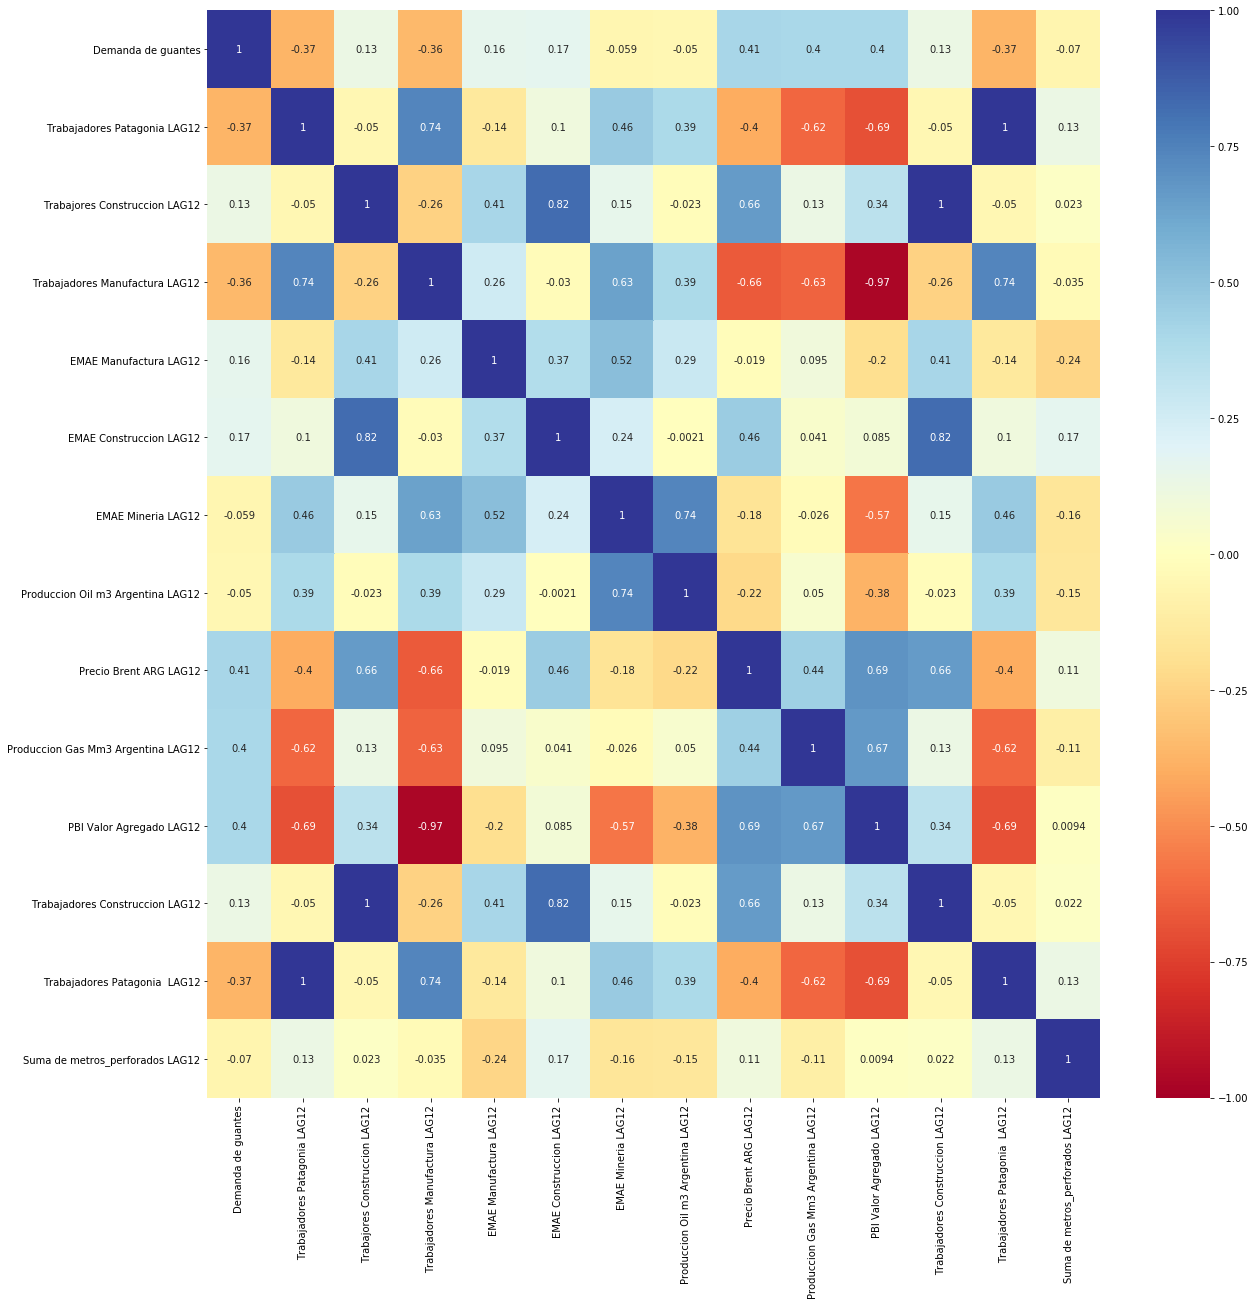

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset[[col for col in dataset.columns if ('LAG12' in col) or ('guantes' in col)]].loc[dataset.index >= '2016-01-01'].corr(), vmin=-1, vmax=1, cmap='RdYlBu', annot=True)

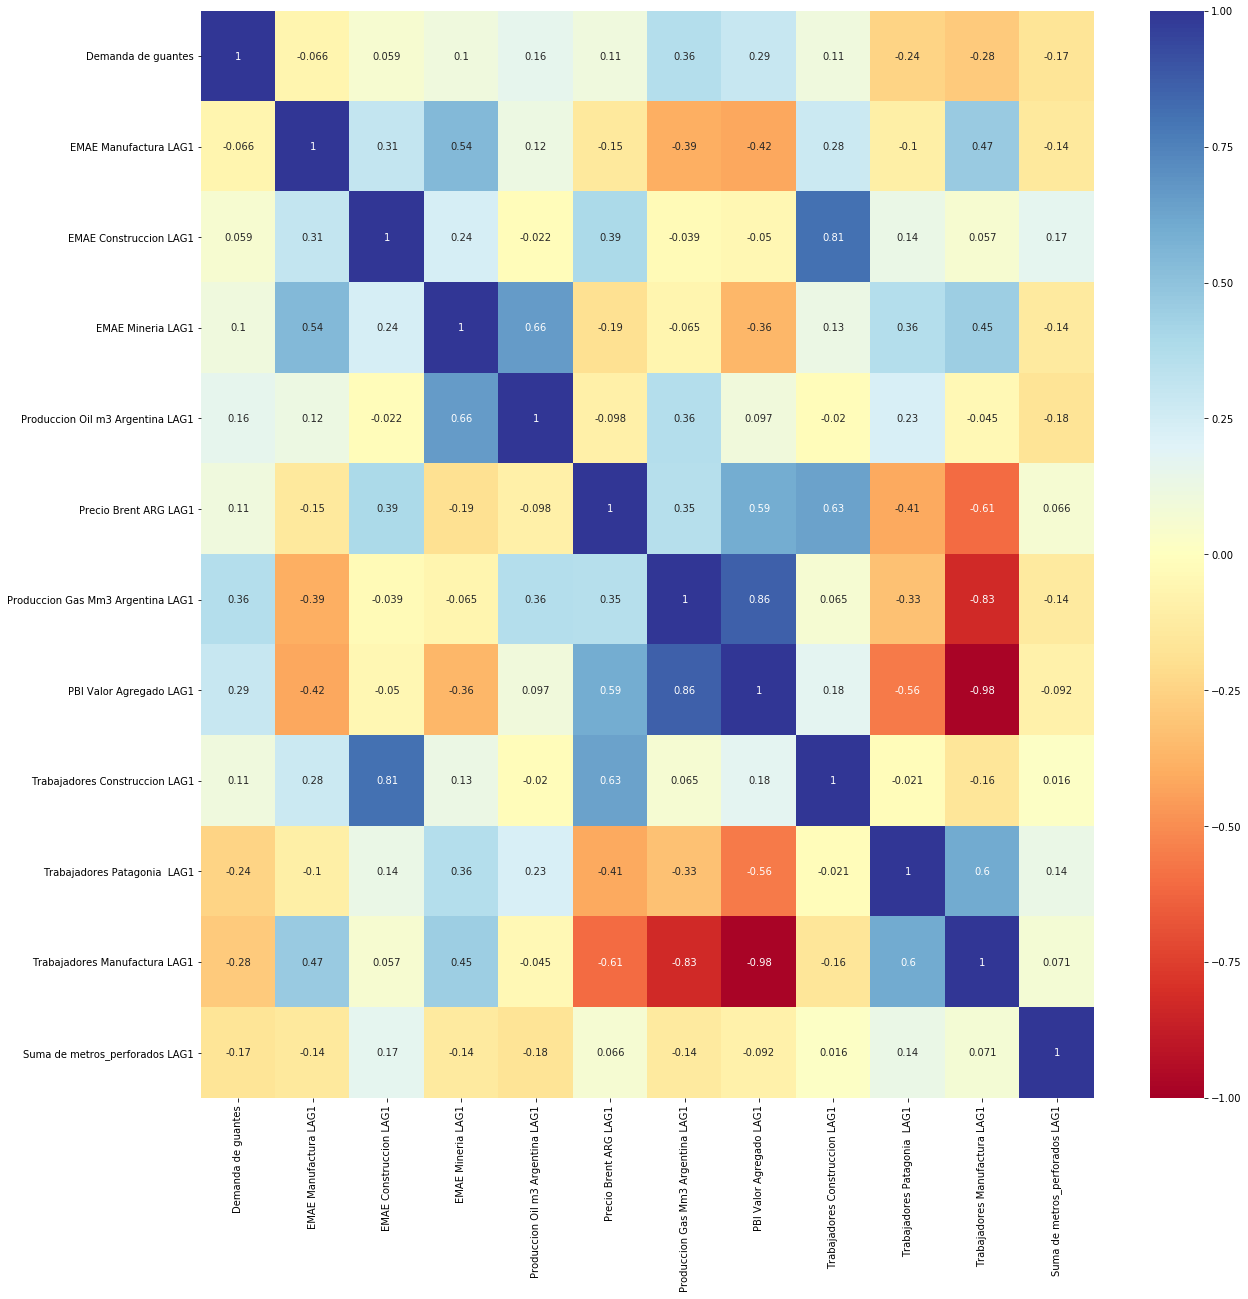

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset[[col for col in dataset.columns if (('LAG1' in col) and ('LAG12' not in col)) or ('guantes' in col)]].corr(), vmin=-1, vmax=1, cmap='RdYlBu', annot=True)

## Identifico variables de interés

In [27]:
variables_posibles = []

corr_l12 = dataset[[col for col in dataset.columns if ('LAG12' in col) or ('guantes' in col)]].loc[dataset.index >= '2016-01-01'].corr()['Demanda de guantes']
variables_posibles.append(corr_l12.loc[(corr_l12 >= 0.4) | (corr_l12 <= -0.4)].index.tolist())

corr_l1 = dataset[[col for col in dataset.columns if (('LAG1' in col) and ('LAG12' not in col)) or ('guantes' in col)]].loc[dataset.index >= '2016-01-01'].corr()['Demanda de guantes']
variables_posibles.append(corr_l1.loc[(corr_l1 >= 0.4) | (corr_l1 <= -0.4)].index.tolist())

corr_l0 = dataset[[col for col in dataset.columns if ('LAG1' not in col) or ('guantes' in col)]].loc[dataset.index >= '2016-01-01'].corr()['Demanda de guantes']
variables_posibles.append(corr_l0.loc[(corr_l0 >= 0.4) | (corr_l0 <= -0.4)].index.tolist())

X_vars = [item for item in list(itertools.chain(*variables_posibles)) if 'Demanda de guantes' != item]
X_vars

['Precio Brent ARG LAG12',
 'Produccion Gas Mm3 Argentina LAG12',
 'Produccion Gas Mm3 Argentina LAG1',
 'Trabajadores Manufactura LAG1',
 'Produccion Gas Mm3 Argentina',
 'Trabajadores Manufactura']

# Pruebo Modelos

In [30]:
X_vars = [
    'Precio Brent ARG LAG12',
 'Produccion Gas Mm3 Argentina LAG12',
 'Trabajadores Manufactura LAG1',
 ]

In [ ]:
model_total = sm.

In [40]:
feature_combinations = []
for k in range(1, 4):
    l = list(itertools.combinations(X_vars, k))
    for elem in l:
        feature_combinations.append(list(elem))
    
feature_combinations

[['Precio Brent ARG LAG12'],
 ['Produccion Gas Mm3 Argentina LAG12'],
 ['Trabajadores Manufactura LAG1'],
 ['Precio Brent ARG LAG12', 'Produccion Gas Mm3 Argentina LAG12'],
 ['Precio Brent ARG LAG12', 'Trabajadores Manufactura LAG1'],
 ['Produccion Gas Mm3 Argentina LAG12', 'Trabajadores Manufactura LAG1'],
 ['Precio Brent ARG LAG12',
  'Produccion Gas Mm3 Argentina LAG12',
  'Trabajadores Manufactura LAG1']]

In [51]:
for i in range(len(feature_combinations)):
    cols = feature_combinations[i]
    X = dataset[cols].dropna()
    idx = X.index
        
    y = dataset.loc[idx]['Demanda de guantes']
    
    X = sm.add_constant(X)
    
    results = sm.OLS(y, X, hasconst=True).fit()
    print(' ')
    print(' ')
    print('='*100)
    print('='*100)
    print(' ')
    print(cols)
    print(results.summary())

 
 
 
['Precio Brent ARG LAG12']
                            OLS Regression Results                            
Dep. Variable:     Demanda de guantes   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     9.171
Date:                Sat, 02 May 2020   Prob (F-statistic):            0.00402
Time:                        18:47:44   Log-Likelihood:                -544.14
No. Observations:                  48   AIC:                             1092.
Df Residuals:                      46   BIC:                             1096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [54]:
dataset[np.sort([col for col in dataset.columns if ('Oil' in col) or ('Brent' in col)])].corr()

,Precio Brent ARG,Precio Brent ARG LAG1,Precio Brent ARG LAG12,Produccion Oil m3 Argentina,Produccion Oil m3 Argentina LAG1,Produccion Oil m3 Argentina LAG12
Precio Brent ARG,1.000000,0.921295,0.252216,-0.077330,-0.155025,-0.558376
Precio Brent ARG LAG1,0.921295,1.000000,0.293344,-0.039137,-0.098081,-0.533866
Precio Brent ARG LAG12,0.252216,0.293344,1.000000,0.544285,0.541988,-0.221571
Produccion Oil m3 Argentina,-0.077330,-0.039137,0.544285,1.000000,0.446367,0.331022
Produccion Oil m3 Argentina LAG1,-0.155025,-0.098081,0.541988,0.446367,1.000000,0.024954
Produccion Oil m3 Argentina LAG12,-0.558376,-0.533866,-0.221571,0.331022,0.024954,1.000000
